In [1]:
#Import Libraries
%matplotlib notebook
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import CSV on Gun Vendors 
dealer_df = pd.read_csv("firearm_clean.csv", low_memory=False)
dealer_df.head()

,Lic Regn,Lic Dist,Lic Cnty,Lic Type,Lic Xprdte,Lic Seqn,License Name,Business Name,Premise Street,Premise City,Premise State,Premise Zip Code,Mail Street,Mail City,Mail State,Mail Zip Code,Voice Phone
0,9.0,86.0,13.0,7.0,9B,3680.0,FREEDOMS ARMORY LLC,FREEDOMS ARMORY,4337 W POWELL DR,NEW RIVER,AZ,85087,1130 E ROD CIR,WASILLA,AK,99654,9.073152e+09
1,9.0,88.0,3.0,7.0,7J,2391.0,WILD WEST GUNS LLC,WILD WEST GUNS,5225 WYNN ROAD,LAS VEGAS,NV,89118,7100 HOMER DR,ANCHORAGE,AK,99518,7.027985e+09
2,9.0,91.0,77.0,1.0,9A,1019.0,"STADLER, RANDY J",STADLER ARMS,3307 RIVER RD,YAKIMA,WA,98902,8000 RUTHERFORD RD,YAKIMA,AK,99903,5.092488e+09
3,9.0,92.0,20.0,1.0,8C,1878.0,CLASSIC ALASKA TRADING/BIG RAYS ALASKA INC,BIG RAYS,320 W 4TH AVE,ANCHORAGE,AK,99501,320 W 4TH AVE,ANCHORAGE,AK,99501,9.072792e+09
4,9.0,92.0,20.0,1.0,8G,21.0,"METZGER, YALE HYDER",NaN,310 WEST 11TH AVE,ANCHORAGE,AK,99501,310 WEST 11TH AVE,ANCHORAGE,AK,99501,9.072777e+09


In [3]:
# Count the amount of Vendor's Premises License by State Registered
dealers = pd.DataFrame(dealer_df["Premise State"].value_counts().reset_index().values, 
                       columns=["State", "Firearm Dealers"])

# Check The DF
dealers.head()

,State,Firearm Dealers
0,TX,7708
1,FL,3861
2,PA,3093
3,CA,3044
4,OH,2968


In [4]:
# Cast "Firearm Dealers" Series from object to an integer
(dealers['Firearm Dealers']).astype(int)

0     7708
1     3861
2     3093
3     3044
4     2968
5     2914
6     2698
7     2625
8     2442
9     2396
10    2234
11    2080
12    2075
13    2015
14    1899
15    1863
16    1855
17    1768
18    1765
19    1727
20    1686
21    1538
22    1526
23    1486
24    1486
25    1452
26    1355
27    1328
28    1313
29    1155
30    1150
31    1123
32    1075
33     833
34     825
35     752
36     744
37     711
38     709
39     652
40     625
41     625
42     611
43     599
44     506
45     398
46     383
47     144
48     116
49     110
50      20
51       9
52       7
53       1
Name: Firearm Dealers, dtype: int64

In [5]:
# Import 2nd DF Suicide Data. Delete Unnecessary Columns, Rearrange
suicide_df = pd.read_csv("suicide_clean.csv", low_memory=False)
del suicide_df["YEAR"]
suicide=suicide_df.rename(columns={"STATE": "State","DEATHS": "Suicides"})
suicide.head()

,State,Suicides
0,AL,836.0
1,AK,200.0
2,AZ,1327.0
3,AR,631.0
4,CA,4312.0


In [7]:
# Merge the Dealers table, and Suicides Table
merge_table = pd.merge(suicide, dealers, on="State",how="left")
merge_table =pd.DataFrame(merge_table)
merge_table
merge_table.head()

,State,Suicides,Firearm Dealers
0,AL,836.0,1486
1,AK,200.0,711
2,AZ,1327.0,2234
3,AR,631.0,1526
4,CA,4312.0,3044


In [8]:
#Get rid of those NaN!
merge_table = merge_table.dropna()
merge_table.head()

,State,Suicides,Firearm Dealers
0,AL,836.0,1486
1,AK,200.0,711
2,AZ,1327.0,2234
3,AR,631.0,1526
4,CA,4312.0,3044


In [9]:
#convert  Firearm Dealers to a float for Graphing 
merge_table["Suicides"]=(merge_table["Suicides"]).astype(int)

merge_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 3 columns):
State              50 non-null object
Suicides           50 non-null int64
Firearm Dealers    50 non-null object
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [10]:
#Load in my 3rd dataset, Homicide
violence_df = pd.read_csv("homicide.csv", low_memory=False)
violence_df.head()

,State,Homicide
0,TX,27
1,TX,9
2,MS,8
3,FL,6
4,CA,6


In [11]:
# Group by "State" and collect sum of "Homicide" per state
violent = violence_df.groupby("State").sum()["Homicide"]
violent = pd.DataFrame(violent)
violent = violent.reset_index()
violent.head()

,State,Homicide
0,AK,69
1,AL,544
2,AR,216
3,AZ,289
4,CA,1423


In [12]:
# Merge Tables together to analyze
final_table = pd.merge(merge_table, violent, on="State",how="left")
final_table =pd.DataFrame(final_table)

final_table.head()

,State,Suicides,Firearm Dealers,Homicide
0,AL,836,1486,544
1,AK,200,711,69
2,AZ,1327,2234,289
3,AR,631,1526,216
4,CA,4312,3044,1423


<IPython.core.display.Javascript object>


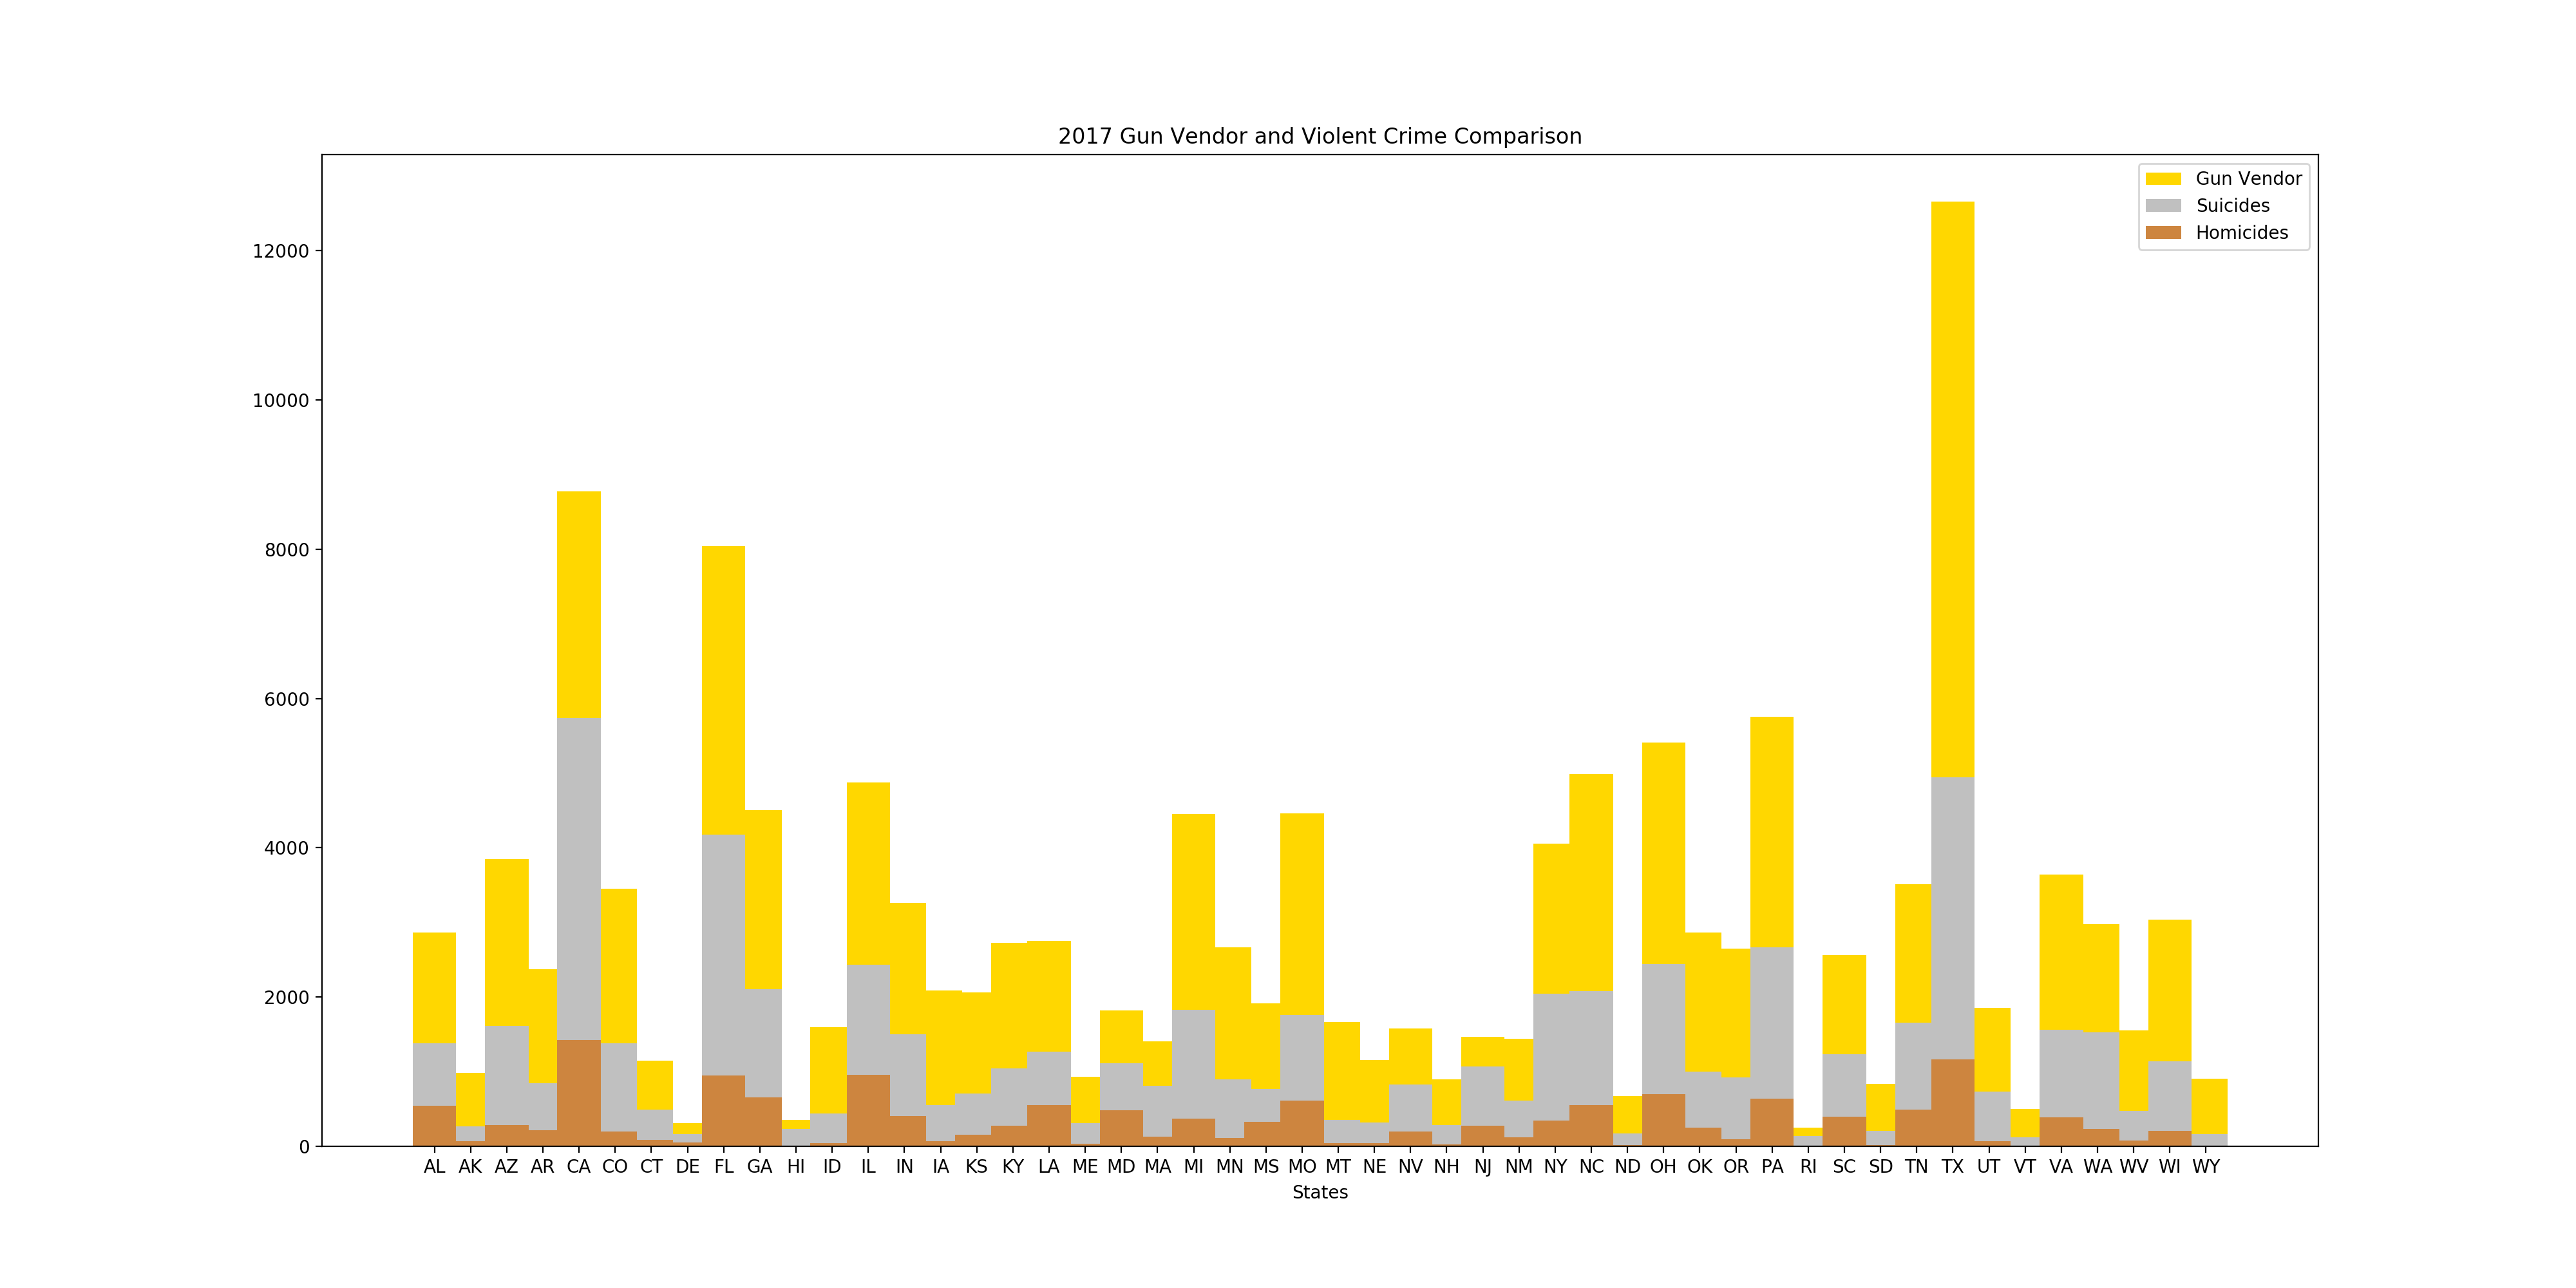

In [17]:
States = (final_table['State'])
homicides = np.array(final_table["Homicide"])
suicides = np.array(final_table["Suicides"])
guns = np.array(final_table["Firearm Dealers"])
ind = [x for x, _ in enumerate(States)]
plt.figure(figsize=(20,10)) 
plt.bar(ind, guns, width=1.2, label='Gun Vendor', color='gold')
plt.bar(ind, suicides, width=1.2, label='Suicides', color='silver')
plt.bar(ind, homicides, width=1.2, label='Homicides', color='#CD853F')


plt.xticks(ind, States)

plt.xlabel("States")
plt.legend(loc="upper right")
plt.title("2017 Gun Vendor and Violent Crime Comparison")

plt.setp(plt.gca().get_xticklabels(), rotation=0
         , horizontalalignment='center')

plt.show()

In [18]:
plt.savefig('ViolenceUS.png')

In [14]:
final_table["Suicide per Store Ratio"] = (final_table['Suicides']/final_table['Firearm Dealers'])
final_table

,State,Suicides,Firearm Dealers,Homicide,Suicide per Store Ratio
0,AL,836,1486,544,0.562584
1,AK,200,711,69,0.281294
2,AZ,1327,2234,289,0.594002
3,AR,631,1526,216,0.413499
4,CA,4312,3044,1423,1.41656
5,CO,1181,2075,199,0.569157
6,CT,405,652,89,0.621166
7,DE,112,144,56,0.777778
8,FL,3227,3861,950,0.835794
9,GA,1451,2396,658,0.605593


In [15]:
#Find the Ratio Avg
mean=(final_table["Suicide per Store Ratio"]).mean()
print(f"Avg Suicide to Gun Vendor Ratio is: {mean}")

Avg Suicide to Gun Vendor Ratio is: 0.6198042042517994
